# ***Libraries Used***

In [1168]:
import warnings
warnings.filterwarnings('ignore')

In [1169]:
# Data-frame manipulation and visualization
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


In [1170]:
# Pre-Processing and Data Wrangling Libraries
from sklearn.preprocessing import ( StandardScaler, MinMaxScaler, 
                                    LabelEncoder, OneHotEncoder, OrdinalEncoder
                                    )

from sklearn.model_selection import (   train_test_split, 
                                        StratifiedKFold,
                                        cross_val_score, validation_curve, learning_curve, LearningCurveDisplay
                                    )


# Loading and first impressions of dataset

In [1171]:
test_data= pd.read_csv(r"customer_churn_dataset-testing-master.csv")

In [1172]:
test_data.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
5,6,30,Male,41,14,10,10,Premium,Monthly,500,29,0
6,7,47,Female,37,15,9,28,Basic,Quarterly,574,14,1
7,8,54,Female,36,11,0,18,Standard,Monthly,323,16,0
8,9,36,Male,20,5,10,8,Basic,Monthly,687,8,0
9,10,65,Male,8,4,2,23,Basic,Annual,995,10,0


In [1173]:
test_data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [1174]:
df= pd.read_csv(r"customer_churn_dataset-training-master.csv")

In [1175]:
df.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [1176]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [1177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


# EDA, Visualization and Preprocessing

In [1178]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

**It seems that there is only a single row of null values in our dataset. Lets try and verify this**

In [1179]:
df[df.isnull().any(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**This shows that entry number 199295 was null. Now the most appropriate way to handle the null row is to drop it. This is because it is a single row in a huge dataset which would not make any difference whatsoever**

In [1180]:
df= df.dropna()

In [1181]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [1182]:
df.shape

(440832, 12)

Checking for any duplicates

In [1183]:
df.duplicated().sum()

0

No duplicates present

# Categorical Columns (Gender, Subscription Type, Contract Length)

In [1184]:
categorical_cols= df.select_dtypes(include='object').columns

In [1185]:
categorical_cols

Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')

In [1186]:
df[categorical_cols].describe()

,Gender,Subscription Type,Contract Length
count,440832,440832,440832
unique,2,3,3
top,Male,Standard,Annual
freq,250252,149128,177198


In [1187]:
for i in categorical_cols:
    print(df[i].value_counts())
    print()

Gender
Male      250252
Female    190580
Name: count, dtype: int64

Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64

Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64



In [1188]:
df.groupby(['Gender'], as_index= False)['Churn'].mean()

,Gender,Churn
0,Female,0.666691
1,Male,0.491269


over 66% of all females opted to churn while arouund 49% of all males opted to churn. 

In [1189]:
df.groupby(['Subscription Type'], as_index= False)['Churn'].mean()


,Subscription Type,Churn
0,Basic,0.581782
1,Premium,0.559417
2,Standard,0.560700


All 3 subscription types seem to have a pretty similar Churn rate. In other words, all 3 subscription type customer groups seem to have a higher likeliness to churn

In [1190]:
df.groupby(['Contract Length'], as_index= False)['Churn'].mean()


,Contract Length,Churn
0,Annual,0.460761
1,Monthly,1.000000
2,Quarterly,0.460256


Customers with a monthly contract are 100% likely to churn! 

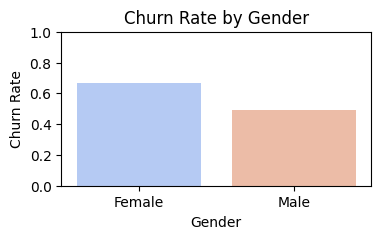

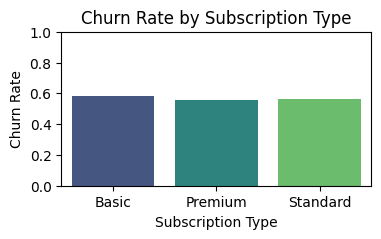

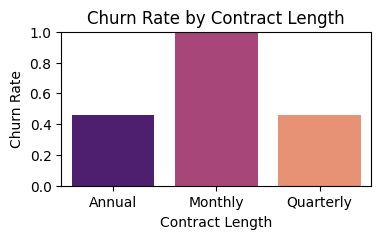

In [1191]:
data = {
    'Gender': ['Female', 'Male'],
    'Churn': [0.666691, 0.491269]
}
df_gender = pd.DataFrame(data)

data = {
    'Subscription Type': ['Basic', 'Premium', 'Standard'],
    'Churn': [0.581782, 0.559417, 0.560700]
}
df_subscription = pd.DataFrame(data)

data = {
    'Contract Length': ['Annual', 'Monthly', 'Quarterly'],
    'Churn': [0.460761, 1.0, 0.460256]
}
df_contract = pd.DataFrame(data)

plt.figure(figsize=(4, 2))
sns.barplot(x='Gender', y='Churn', data=df_gender, palette='coolwarm')
plt.title('Churn Rate by Gender')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()


plt.figure(figsize=(4, 2))
sns.barplot(x='Subscription Type', y='Churn', data=df_subscription, palette='viridis')
plt.title('Churn Rate by Subscription Type')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(4, 2))
sns.barplot(x='Contract Length', y='Churn', data=df_contract, palette='magma')
plt.title('Churn Rate by Contract Length')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()


Our suspicion for whether or not subscription type gives any useful info has already increased

Let us consider combining the Contract Length and Subscription type column to see if doing so reveals more informative patterns compared to patterns shown by subscription type alone!

In [1192]:

subscription_map = {
    'Basic': 'Bsc',
    'Premium': 'Prm',
    'Standard': 'Std'
}

contract_map = {
    'Annual': 'Ann',
    'Monthly': 'Mon',
    'Quarterly': 'Qua'
}

df['Subscription_Contract'] = df['Subscription Type'].map(subscription_map) + '-' + df['Contract Length'].map(contract_map)


In [1193]:
sub_cont=df.groupby(['Subscription_Contract'], as_index= False)['Churn'].mean()
sub_cont


,Subscription_Contract,Churn
0,Bsc-Ann,0.474501
1,Bsc-Mon,1.000000
2,Bsc-Qua,0.475884
3,Prm-Ann,0.453918
4,Prm-Mon,1.000000
5,Prm-Qua,0.450762
6,Std-Ann,0.454453
7,Std-Mon,1.000000
8,Std-Qua,0.454979


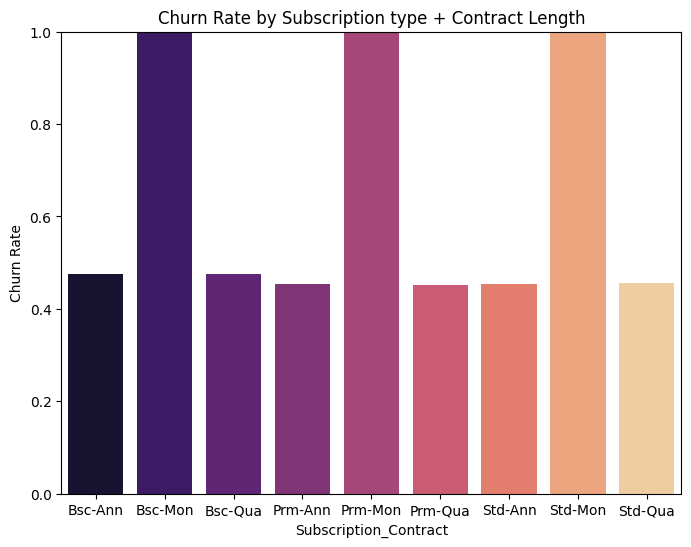

In [1194]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Subscription_Contract', y='Churn', data=sub_cont, palette='magma')
plt.title('Churn Rate by Subscription type + Contract Length')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

In [1195]:
df['Subscription_Contract'].value_counts()

Subscription_Contract
Std-Qua    60128
Std-Ann    60015
Prm-Ann    59828
Prm-Qua    59781
Bsc-Ann    57355
Bsc-Qua    56621
Prm-Mon    29069
Bsc-Mon    29050
Std-Mon    28985
Name: count, dtype: int64

In [1196]:
subscription_map = {
    'Basic': 'Bsc',
    'Premium': 'Prm',
    'Standard': 'Std'
}

contract_map = {
    'Annual': 'Ann',
    'Monthly': 'Mon',
    'Quarterly': 'Qua'
}

test_data['Subscription_Contract'] = test_data['Subscription Type'].map(subscription_map) + '-' + test_data['Contract Length'].map(contract_map)

# Support Calls

In [1197]:
sup_calls=df.groupby(['Support Calls'], as_index= False)['Churn'].mean()
sup_calls

,Support Calls,Churn
0,0.0,0.302826
1,1.0,0.303630
2,2.0,0.315513
3,3.0,0.416431
4,4.0,0.584981
5,5.0,0.947147
6,6.0,1.000000
7,7.0,1.000000
8,8.0,1.000000
9,9.0,1.000000


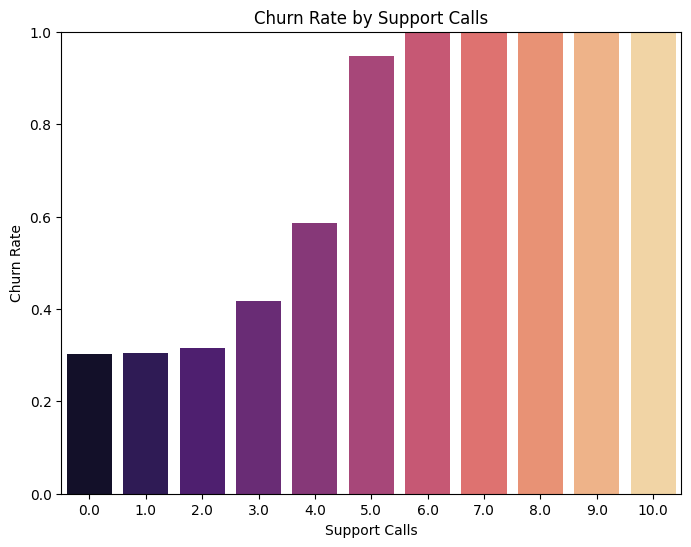

In [1198]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Support Calls', y='Churn', data=sup_calls, palette='magma')
plt.title('Churn Rate by Support Calls')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

This shows that as support calls increase, the churn rate also increases, and customers who have atleast 6 support calls are 100% likely to churn

# Age

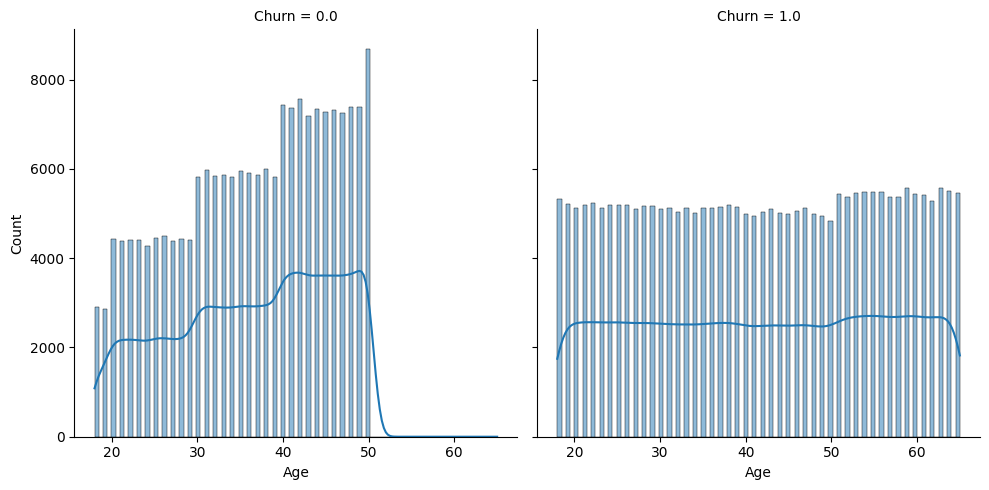

In [1199]:
sns.displot(data= df, x= df['Age'], col= df['Churn'], kde= True)
plt.show()

Customers in their 30s and 40s seem to have a higher likelihood of staying (Churn = 0) but there is a huge drop in ages beyond 50 which shows older people are least likely to stay.
Churn = 1 occurs relatively highly for older people (50+ Age) further strengthening the claim. 

Lets divide Customers into 5 groups by their ages

In [1200]:
df['Age_Cut']= pd.qcut(df['Age'], 5)
test_data['Age_Cut']= pd.qcut(test_data['Age'], 5)

In [1201]:
age_cut=df.groupby(['Age_Cut'], as_index= False)['Churn'].mean()
age_cut

,Age_Cut,Churn
0,"(17.999, 27.0]",0.558467
1,"(27.0, 35.0]",0.481058
2,"(35.0, 43.0]",0.433713
3,"(43.0, 50.0]",0.399004
4,"(50.0, 65.0]",1.000000


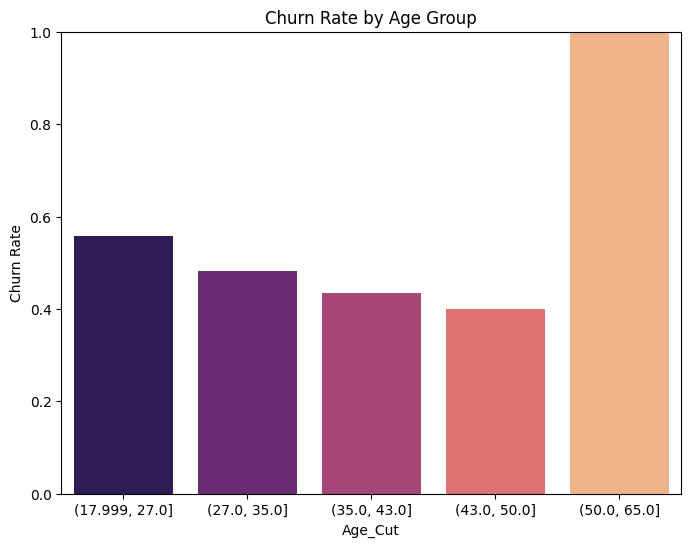

In [1202]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Cut', y='Churn', data=age_cut, palette='magma')
plt.title('Churn Rate by Age Group')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

So Lets rework the Age and Age cut columns now as the grouping of ages into 5 groups captures the pattern better!

Also note, the lower age limit for the customers in the data seems to be 18, and the upper limit seems to be 65, in other words, all customers seem to be >= 18 years old or <= 65 years old.

In [1203]:
df.loc[(df['Age'] > 17.999) & (df['Age'] <= 27), 'Age'] = 0
df.loc[(df['Age'] > 27) & (df['Age'] <= 35), 'Age'] = 1
df.loc[(df['Age'] > 35) & (df['Age'] <= 43), 'Age'] = 2
df.loc[(df['Age'] > 43) & (df['Age'] <= 50), 'Age'] = 3
df.loc[(df['Age'] > 50) & (df['Age'] <= 65), 'Age'] = 4
df.loc[df['Age'] > 65, 'Age']

test_data.loc[(test_data['Age'] > 17.999) & (test_data['Age'] <= 27), 'Age'] = 0
test_data.loc[(test_data['Age'] > 27) & (test_data['Age'] <= 35), 'Age'] = 1
test_data.loc[(test_data['Age'] > 35) & (test_data['Age'] <= 43), 'Age'] = 2
test_data.loc[(test_data['Age'] > 43) & (test_data['Age'] <= 50), 'Age'] = 3
test_data.loc[(test_data['Age'] > 50) & (test_data['Age'] <= 65), 'Age'] = 4
test_data.loc[df['Age'] > 65, 'Age']


Series([], Name: Age, dtype: int64)

In [1204]:
df['Age'].value_counts()

Age
2.0    93804
0.0    92847
3.0    87583
1.0    84944
4.0    81654
Name: count, dtype: int64

# Usage Frequency

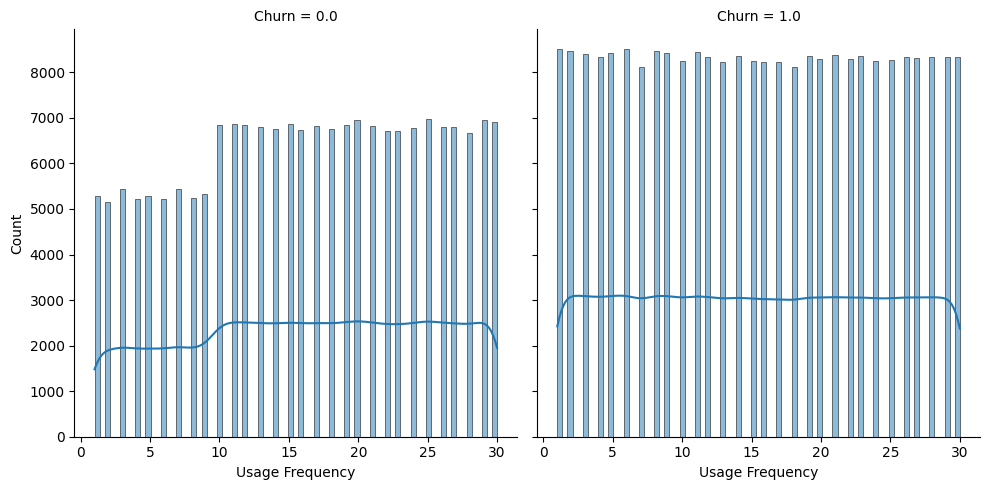

In [1205]:
sns.displot(data= df, x= df['Usage Frequency'], col= df['Churn'], kde= True)
plt.show()

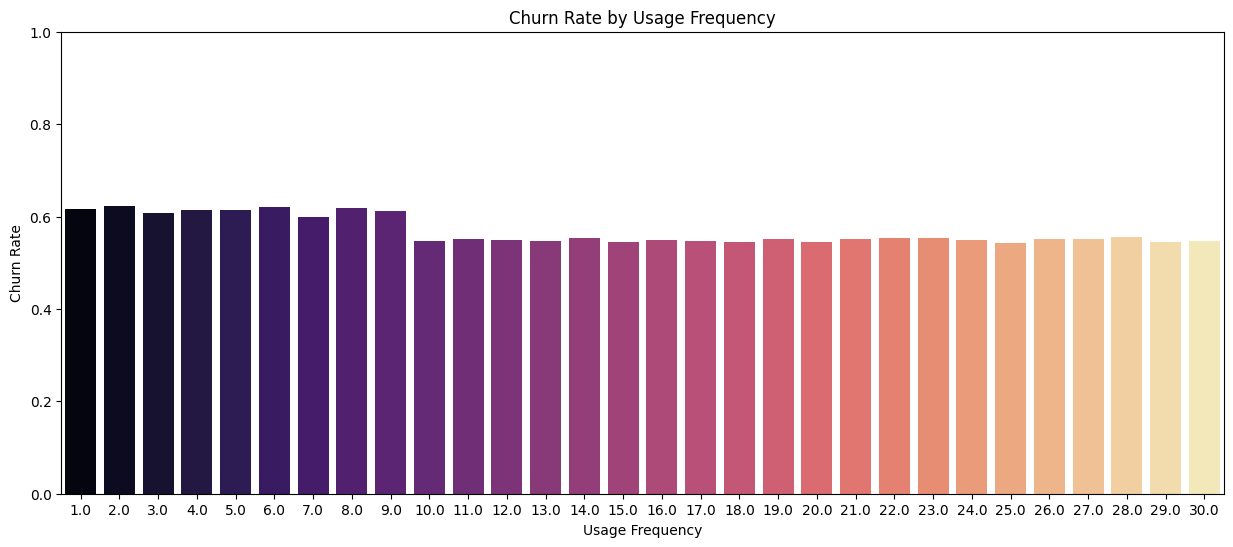

In [1206]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Usage Frequency', y='Churn', data= df.groupby(['Usage Frequency'], as_index= False)['Churn'].mean(), palette='magma')
plt.title('Churn Rate by Usage Frequency')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

Customers with a higher usage frequency are more likely to stay.

# Tenure

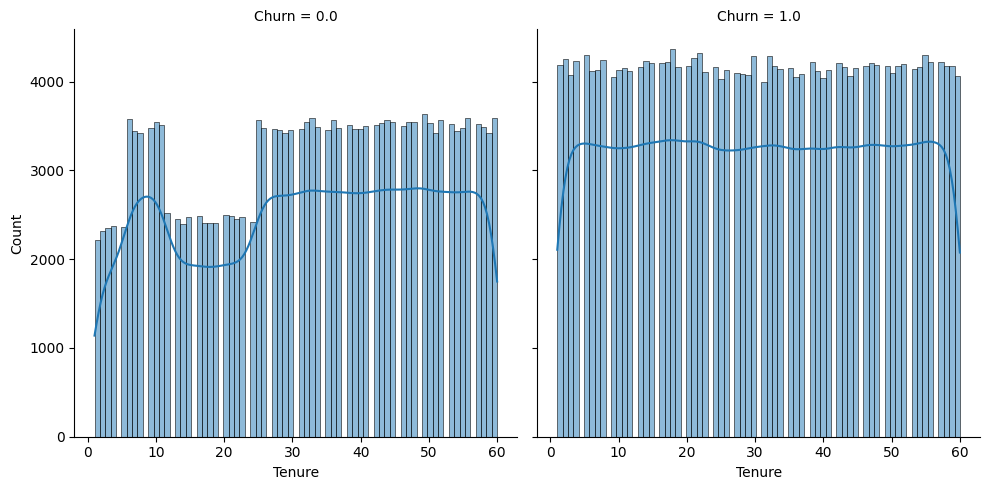

In [1207]:
sns.displot(data= df, x= df['Tenure'], col= df['Churn'], kde= True)
plt.show()

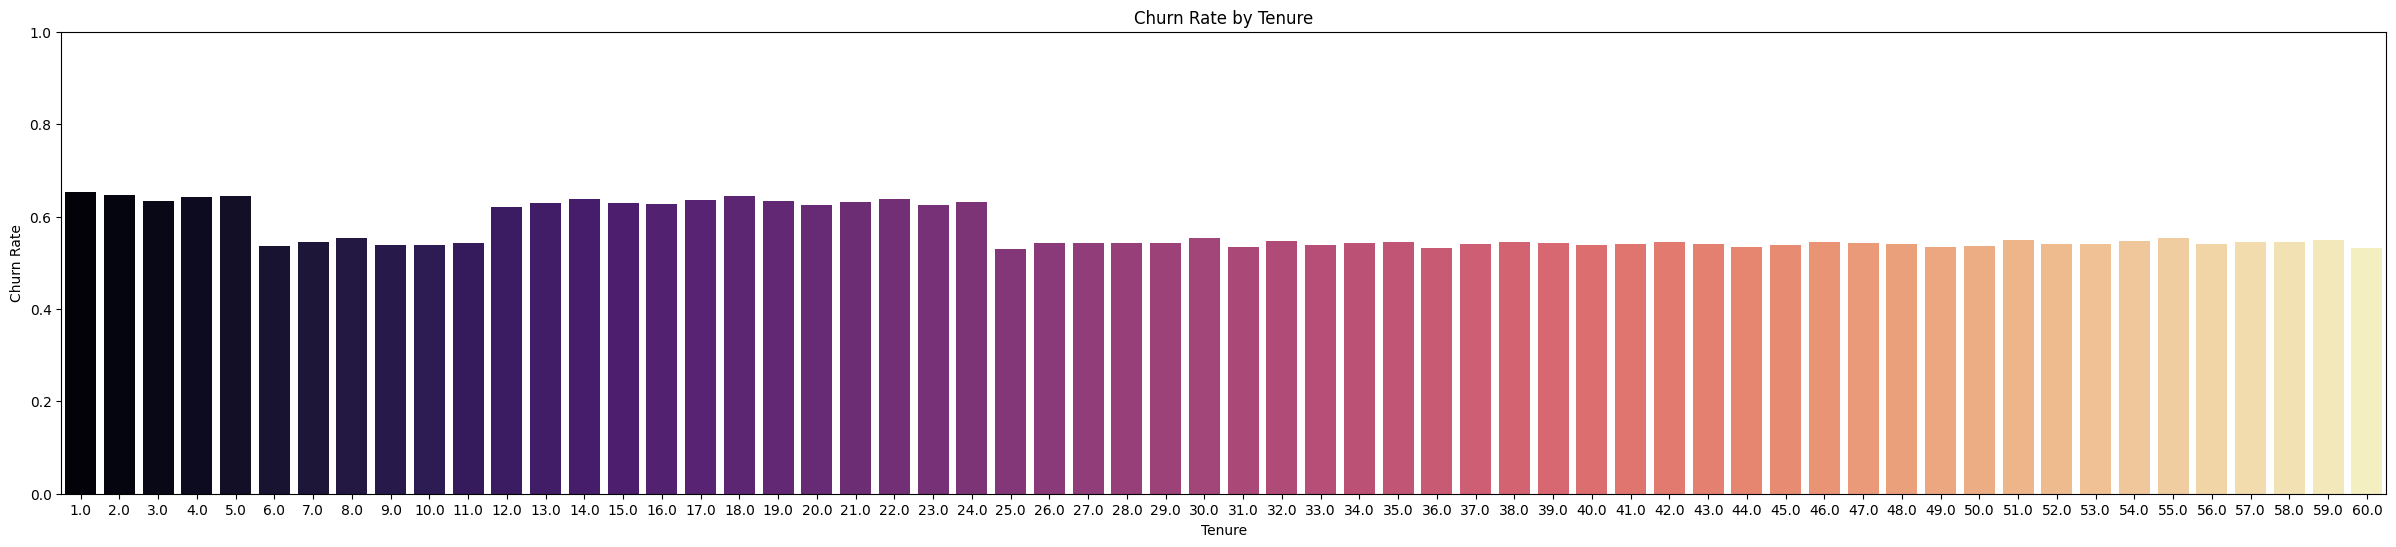

In [1208]:
plt.figure(figsize=(30, 6))
sns.barplot(x='Tenure', y='Churn', data= df.groupby(['Tenure'], as_index= False)['Churn'].mean(), palette='magma')
plt.title('Churn Rate by Tenure')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

Customers with longer tenure (25+ months) are more likely to stay  as seen in the above figures. A peak in the displot for churn=0 is also noticed for customers with tenure around 5-12 months.

In [1209]:
df['Tenure_groups']= pd.qcut(df['Tenure'],10)
test_data['Tenure_groups']= pd.qcut(test_data['Tenure'], 10)

In [1210]:
Tenure_cut=df.groupby(['Tenure_groups'], as_index= False)['Churn'].mean()
Tenure_cut

,Tenure_groups,Churn
0,"(0.999, 7.0]",0.611258
1,"(7.0, 13.0]",0.567400
2,"(13.0, 20.0]",0.634008
3,"(20.0, 26.0]",0.597006
4,"(26.0, 32.0]",0.544042
5,"(32.0, 38.0]",0.540615
6,"(38.0, 43.0]",0.541870
7,"(43.0, 49.0]",0.539094
8,"(49.0, 55.0]",0.544837
9,"(55.0, 60.0]",0.542435


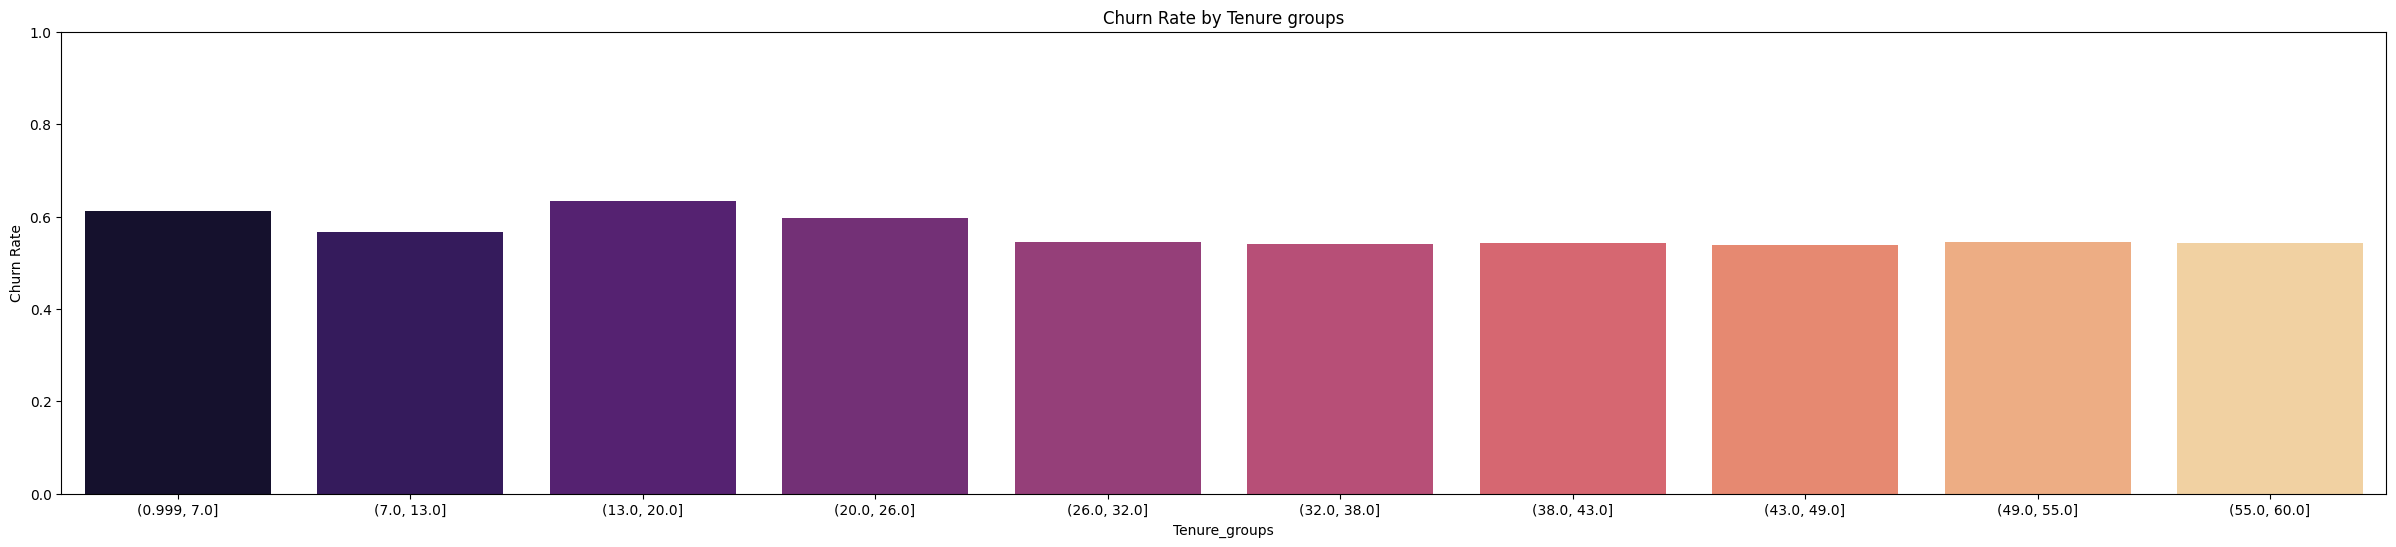

In [1211]:
plt.figure(figsize=(30, 6))
sns.barplot(x='Tenure_groups', y='Churn', data= df.groupby(['Tenure_groups'], as_index= False)['Churn'].mean(), palette='magma')
plt.title('Churn Rate by Tenure groups')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

In [ ]:
df.loc[(df['Tenure'] > 0.999) & (df['Tenure'] <= 7.0), 'Tenure'] = 0
df.loc[(df['Tenure'] > 7.0) & (df['Tenure'] <= 13.0), 'Tenure'] = 1
df.loc[(df['Tenure'] > 13.0) & (df['Tenure'] <= 20.0), 'Tenure'] = 2
df.loc[(df['Tenure'] > 20.0) & (df['Tenure'] <= 26.0), 'Tenure'] = 3
df.loc[(df['Tenure'] > 26.0) & (df['Tenure'] <= 32.0), 'Tenure'] = 4
df.loc[(df['Tenure'] > 32.0) & (df['Tenure'] <= 38.0), 'Tenure'] = 5
df.loc[(df['Tenure'] > 38.0) & (df['Tenure'] <= 43.0), 'Tenure'] = 6
df.loc[(df['Tenure'] > 43.0) & (df['Tenure'] <= 49.0), 'Tenure'] = 7
df.loc[(df['Tenure'] > 49.0) & (df['Tenure'] <= 55.0), 'Tenure'] = 8
df.loc[(df['Tenure'] > 55.0) & (df['Tenure'] <= 60.0), 'Tenure'] = 9
df.loc[(df['Tenure'] > 60), 'Tenure']

test_data.loc[(test_data['Tenure'] > 0.999) & (test_data['Tenure'] <= 7.0), 'Tenure'] = 0
test_data.loc[(test_data['Tenure'] > 7.0) & (test_data['Tenure'] <= 13.0), 'Tenure'] = 1
test_data.loc[(test_data['Tenure'] > 13.0) & (test_data['Tenure'] <= 20.0), 'Tenure'] = 2
test_data.loc[(test_data['Tenure'] > 20.0) & (test_data['Tenure'] <= 26.0), 'Tenure'] = 3
test_data.loc[(test_data['Tenure'] > 26.0) & (test_data['Tenure'] <= 32.0), 'Tenure'] = 4
test_data.loc[(test_data['Tenure'] > 32.0) & (test_data['Tenure'] <= 38.0), 'Tenure'] = 5
test_data.loc[(test_data['Tenure'] > 38.0) & (test_data['Tenure'] <= 43.0), 'Tenure'] = 6
test_data.loc[(test_data['Tenure'] > 43.0) & (test_data['Tenure'] <= 49.0), 'Tenure'] = 7
test_data.loc[(test_data['Tenure'] > 49.0) & (test_data['Tenure'] <= 55.0), 'Tenure'] = 8
test_data.loc[(test_data['Tenure'] > 55.0) & (test_data['Tenure'] <= 60.0), 'Tenure'] = 9
test_data.loc[(test_data['Tenure'] > 60), 'Tenure']


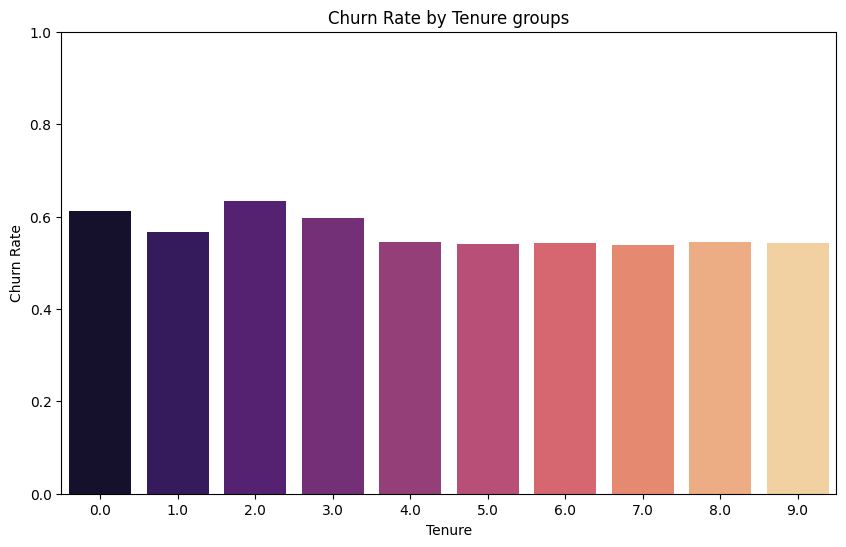

In [1218]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Tenure', y='Churn', data= df.groupby(['Tenure'], as_index= False)['Churn'].mean(), palette='magma')
plt.title('Churn Rate by Tenure groups')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

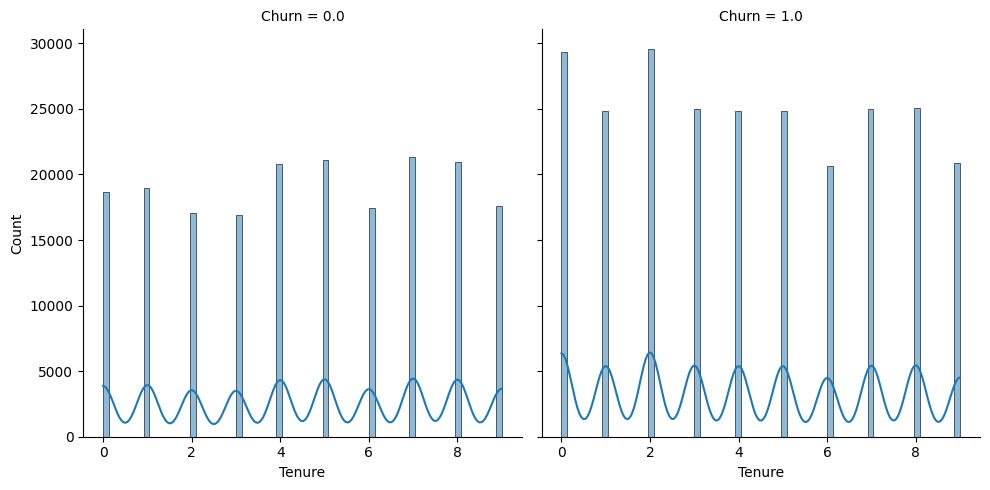

<Figure size 1000x600 with 0 Axes>

In [1220]:
sns.displot(data= df, x= df['Tenure'], col= df['Churn'],kde= True)
plt.figure(figsize=(10, 6))
plt.show()

# Payment Delay

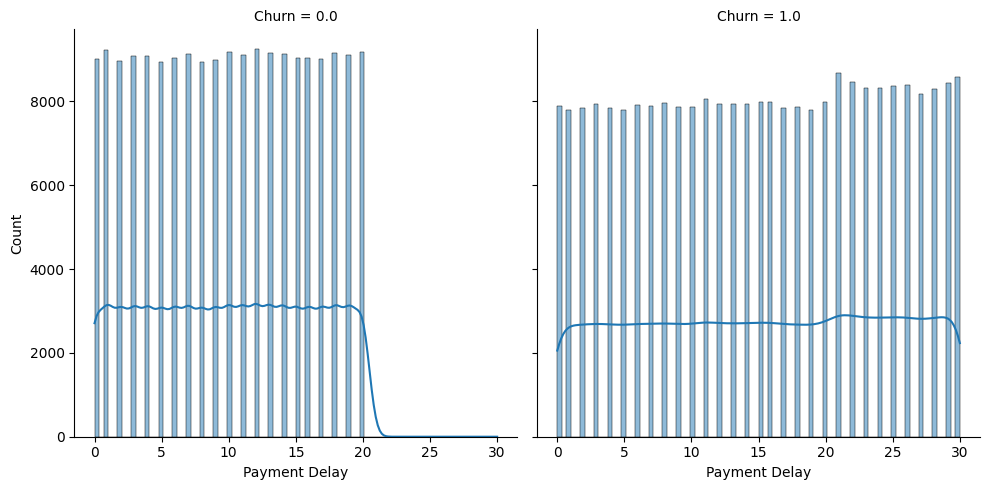

In [1215]:
sns.displot(data= df, x= df['Payment Delay'], col= df['Churn'], kde= True)
plt.show()

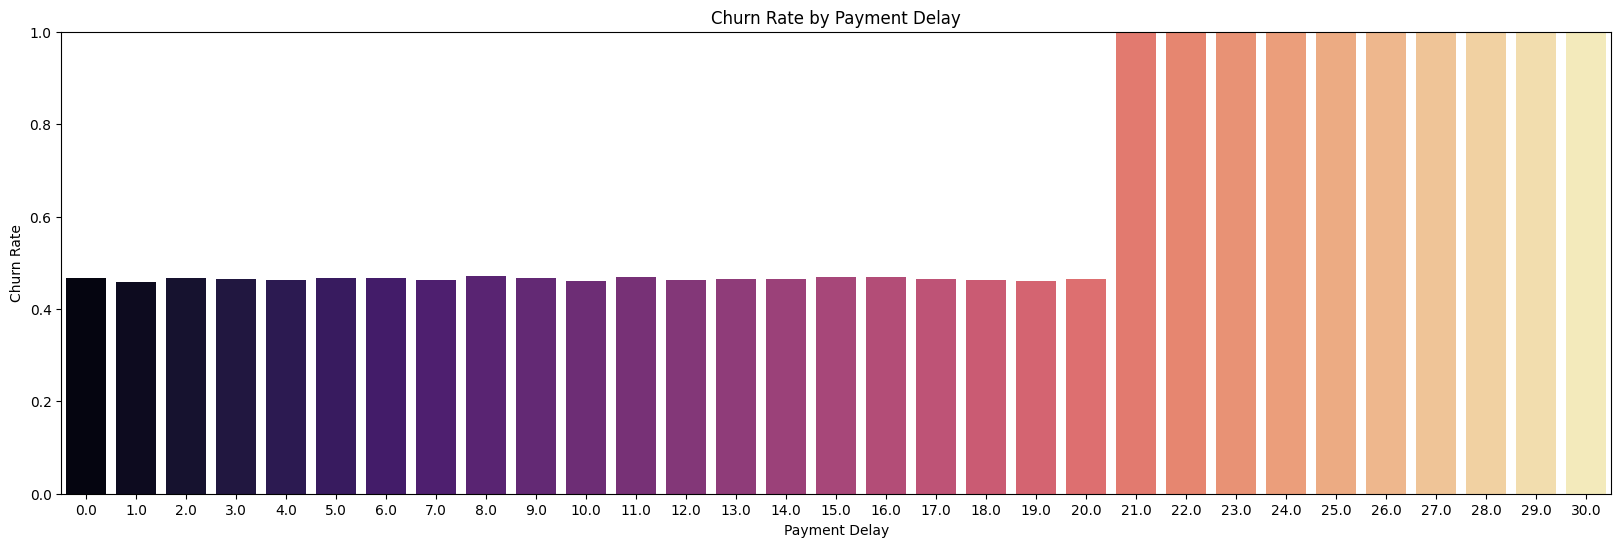

In [1216]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Payment Delay', y='Churn', data= df.groupby(['Payment Delay'], as_index= False)['Churn'].mean(), palette='magma')
plt.title('Churn Rate by Payment Delay')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

This might imply that a delay in payment of more then 20 days may result in customer churns. 

# Total Spend

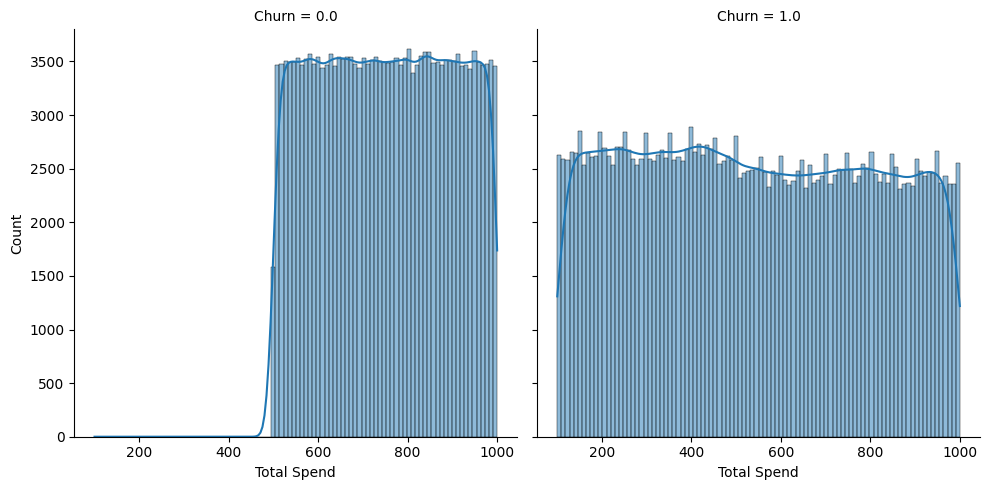

In [1217]:
sns.displot(data= df, x= df['Total Spend'], col= df['Churn'], kde= True)
plt.show()

Customers who have spend more then around $500 seem to stay (Churn =0). 
For customer who do churn (Churn=1), there is a minor drop in churn beyond $500 total spend...